In [1]:
import pandas as pd
import matplotlib.pyplot as plt

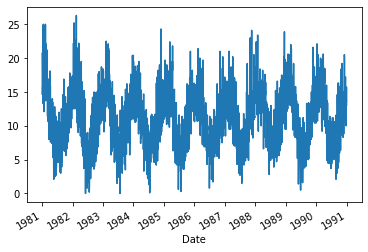

In [2]:
df = pd.read_csv('data/daily-min-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
df.plot()
plt.show()

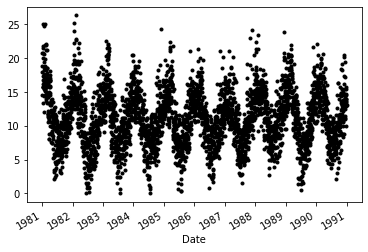

In [3]:
df.plot(style='k.')
plt.show()

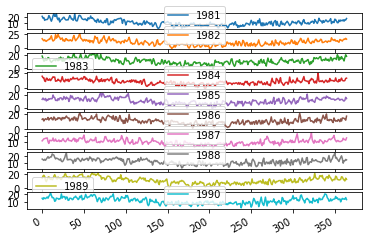

In [4]:
# grouping by year-end
groups = df.groupby(pd.Grouper(freq='A'))
years = pd.DataFrame()
for name, group in groups:
    years[name.year] = group.values
years.plot(subplots=True)
plt.show()

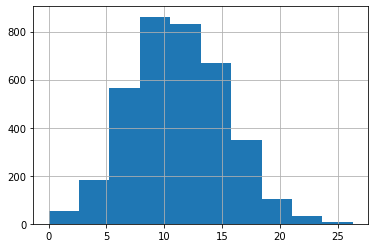

In [5]:
# hist plot
df.hist()
plt.show()

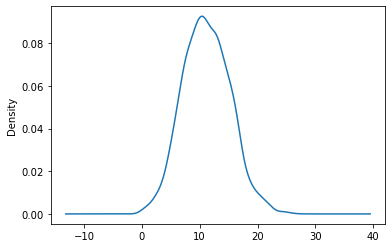

In [6]:
# kde plot
df.plot(kind='kde')
plt.show()

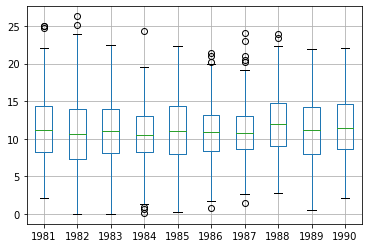

In [7]:
# box plot years
groups = df.groupby(pd.Grouper(freq='A'))
years = pd.DataFrame()
for name, group in groups:
    years[name.year] = group.values
years.boxplot()
plt.show()

     1     2     3     4     5     6    7     8     9     10    11    12
0  14.8  12.0  19.3  15.3  13.0   9.7  7.4   6.8   6.0  11.3  15.4  13.3
1  13.3  12.2  17.3  14.7  13.9   8.2  7.3   9.8   9.5  10.5  11.8  13.2
2  15.6  14.8  19.0  11.0  12.6   8.4  7.7   5.7   8.6   9.9  13.0  16.2
3  14.5  14.8  19.8  12.2  14.3   8.5  7.7   8.6   7.6  11.0  11.1  17.3
4  14.3  14.4  19.3  14.2  16.0  10.4  9.3  10.6  10.4  14.0  12.5  20.5


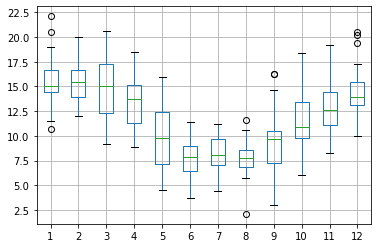

In [8]:
# box plot months
year = df['1990']
groups = year.groupby(pd.Grouper(freq='M'))
months = pd.concat([pd.DataFrame(x[1].values) for x in groups], axis=1)
months = pd.DataFrame(months)
months.columns = range(1,13)
print(months.head())
months.boxplot()
plt.show()

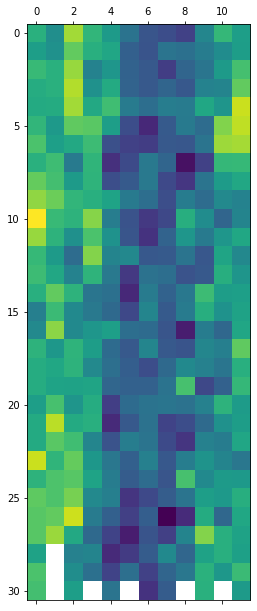

In [9]:
# heat map
plt.matshow(months, interpolation=None, aspect='auto')
plt.show()

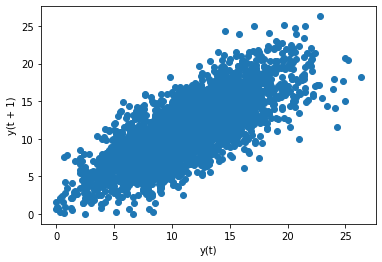

In [10]:
# lag plot
# x-axis -> observation at time t
# y-axis -> observation at time t+1

from pandas.plotting import lag_plot
lag_plot(df)
plt.show()

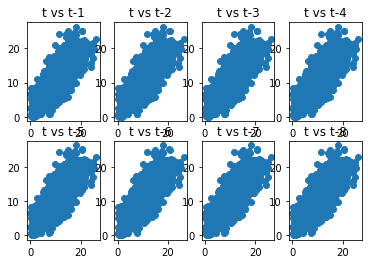

In [11]:
values = pd.DataFrame(df.values)
lags = 8
columns = [values]
for i in range(1, lags+1):
    columns.append(values.shift(1))

dataframe = pd.concat(columns, axis=1)
columns = ['t']
for i in range(1, lags+1):
    columns.append('t-'+str(i))
dataframe.columns = columns
plt.figure(1)

for i in range(1, lags+1):
    ax = plt.subplot(240+i)
    ax.set_title('t vs t-' + str(i))
    plt.scatter(x=dataframe['t'].values, y=dataframe['t-'+str(i)].values)

plt.show()

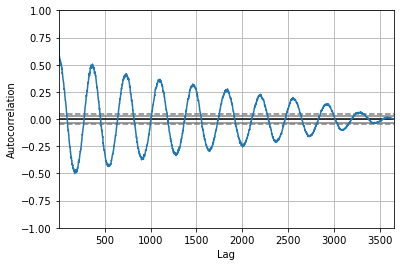

In [12]:
# auto-correlation plot
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df)
plt.show()